Import necessary packages

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from scipy import stats

Read in the data


In [7]:
Nematode = pd.read_csv("Nematode.csv", header = None)
Nematode

,0,1,2,3,4,5,6,7,8
0,"Data 3: Nematoe individual biomass = ug, heavy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Area,Trophic_group,Code,nematode_individual_biomass,Cr,Cu,Mn,Ni,Zn
3,Bagnoli-Coroglio Bay,predators of microbes,1A,0.78,2.45,187.97,1.14,14,442.85
4,Bagnoli-Coroglio Bay,predators of microbes,1A,1.05,1.87,177.57,1.76,7.83,424.25
...,...,...,...,...,...,...,...,...,...
70,Gabicce Mare,microalgal grazers,2A,0.54,0.36,29.75,1.48,10.99,344.54
71,Gabicce Mare,microalgal grazers,2A,0.44,0.3,57.49,2.55,11.31,272.88
72,Gabicce Mare,predators of metazoans,2B,0.66,0.57,6.16,5.43,3.24,298.46
73,Gabicce Mare,predators of metazoans,2B,0.86,0.45,5.68,4.26,2.56,313.18


Clean up the data by skipping the top two rows and rename cleaned up dataframe as Nematode

In [8]:
Nematode = pd.read_csv(
    "Nematode.csv",
    skiprows=2)

Nematode 

,Area,Trophic_group,Code,nematode_individual_biomass,Cr,Cu,Mn,Ni,Zn
0,Bagnoli-Coroglio Bay,predators of microbes,1A,0.78,2.45,187.97,1.14,14.00,442.85
1,Bagnoli-Coroglio Bay,predators of microbes,1A,1.05,1.87,177.57,1.76,7.83,424.25
2,Bagnoli-Coroglio Bay,predators of microbes,1A,0.52,0.00,201.69,2.38,15.61,421.07
3,Bagnoli-Coroglio Bay,predators of microbes,1A,0.34,2.07,139.18,0.88,9.27,417.52
4,Bagnoli-Coroglio Bay,predators of microbes,1A,0.43,1.93,203.40,1.78,9.81,449.02
...,...,...,...,...,...,...,...,...,...
67,Gabicce Mare,microalgal grazers,2A,0.54,0.36,29.75,1.48,10.99,344.54
68,Gabicce Mare,microalgal grazers,2A,0.44,0.30,57.49,2.55,11.31,272.88
69,Gabicce Mare,predators of metazoans,2B,0.66,0.57,6.16,5.43,3.24,298.46
70,Gabicce Mare,predators of metazoans,2B,0.86,0.45,5.68,4.26,2.56,313.18


Remove the "Code" column as we will not be using it

In [9]:
Nematode = Nematode.drop(["Code"], axis=1)

Have a look at the first few rows of the dataframe

In [10]:
Nematode.head()

,Area,Trophic_group,nematode_individual_biomass,Cr,Cu,Mn,Ni,Zn
0,Bagnoli-Coroglio Bay,predators of microbes,0.78,2.45,187.97,1.14,14.00,442.85
1,Bagnoli-Coroglio Bay,predators of microbes,1.05,1.87,177.57,1.76,7.83,424.25
2,Bagnoli-Coroglio Bay,predators of microbes,0.52,0.00,201.69,2.38,15.61,421.07
3,Bagnoli-Coroglio Bay,predators of microbes,0.34,2.07,139.18,0.88,9.27,417.52
4,Bagnoli-Coroglio Bay,predators of microbes,0.43,1.93,203.40,1.78,9.81,449.02


Use seaborn for plotting categorical data. Here I use it to plot the average heavy metal concentration per trophic group. Loop this to plot it for every heavy metal in the dataset. Also added some code to rotate the x-axis labels to make them fit better, change the y-axis title, and set a title for each boxplot. 

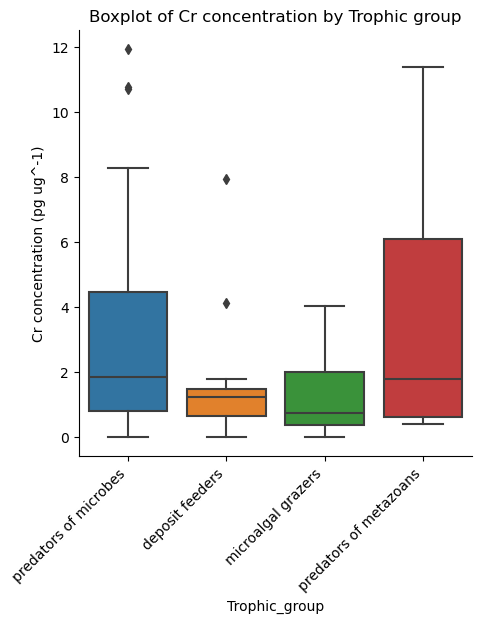

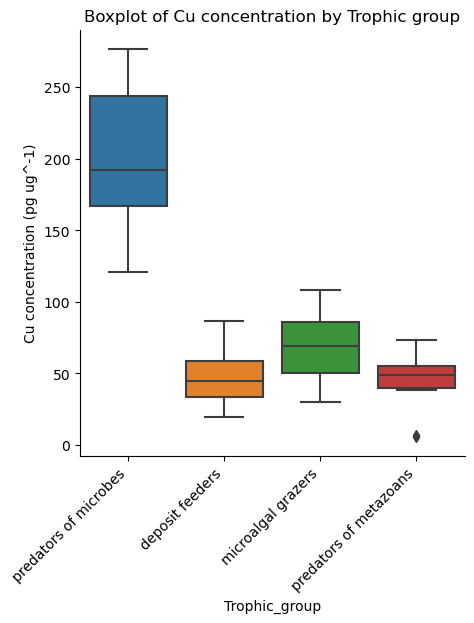

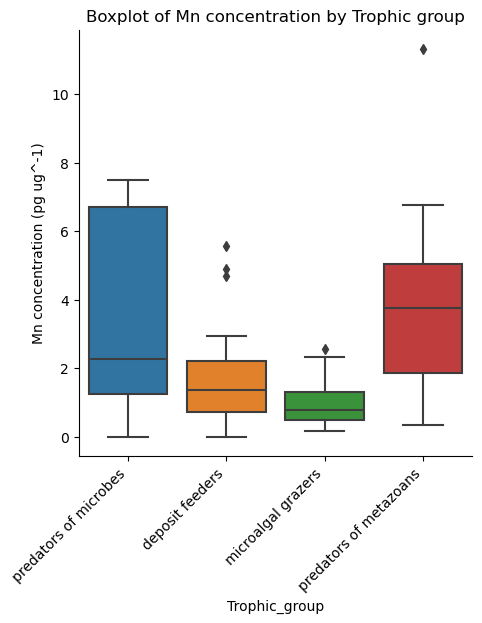

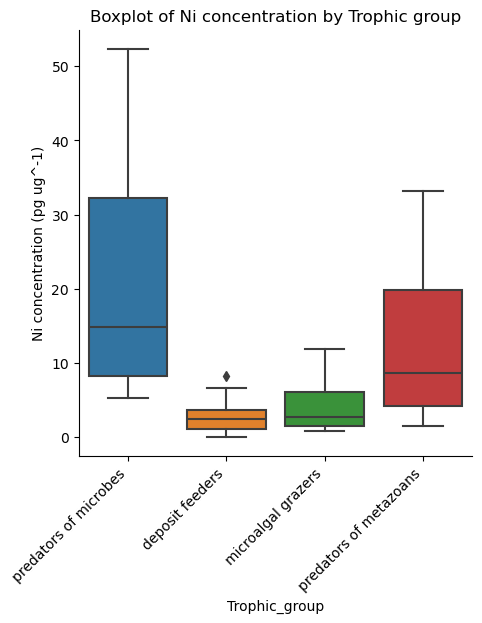

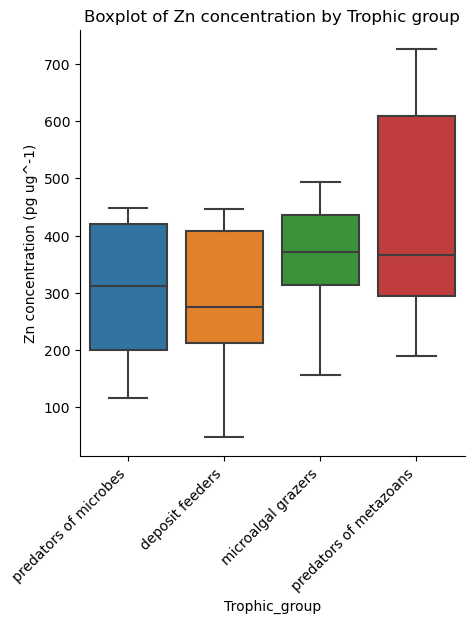

In [11]:
metals = ['Cr', 'Cu', 'Mn', 'Ni', 'Zn']

for metal in metals:
    catplot = sns.catplot(
        data=Nematode,
        x="Trophic_group",
        y=metal,  
        kind="box",
    )

    catplot.set_xticklabels(rotation=45, ha='right')
    catplot.set_ylabels(f"{metal} concentration (pg ug^-1)")


    catplot.set(title=f"Boxplot of {metal} concentration by Trophic group")

    plt.show()

To do some statistical analysis on the data I first check if the metal concentrations are normally distributed using histograms and QQ plots

/Users/fs17974/anaconda3/envs/Shortproject/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


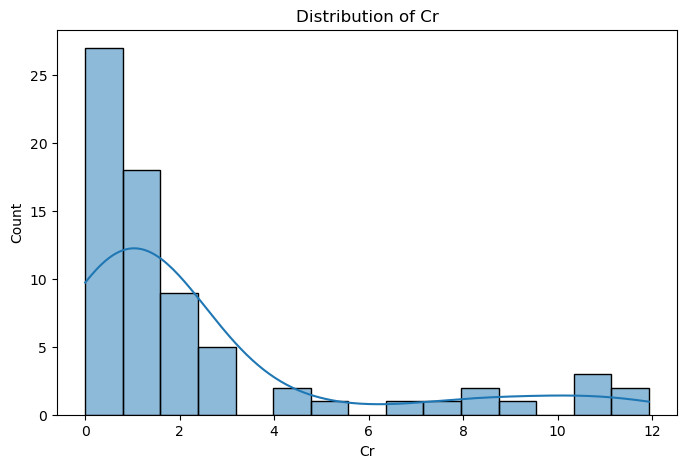

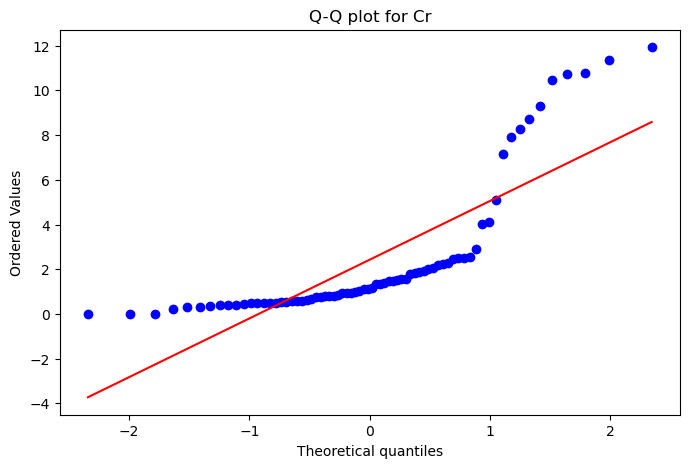

/Users/fs17974/anaconda3/envs/Shortproject/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


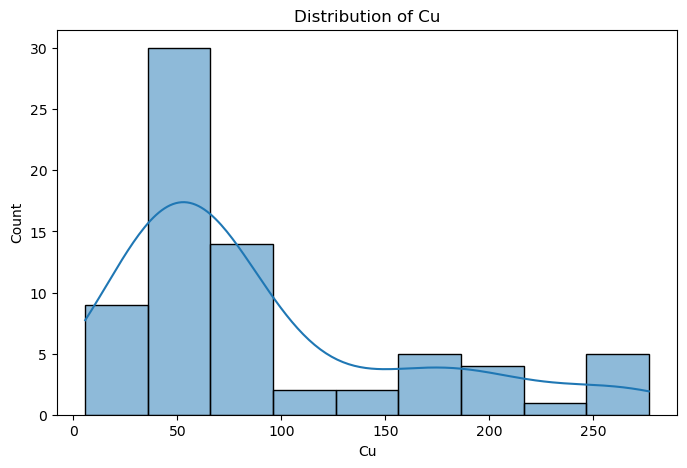

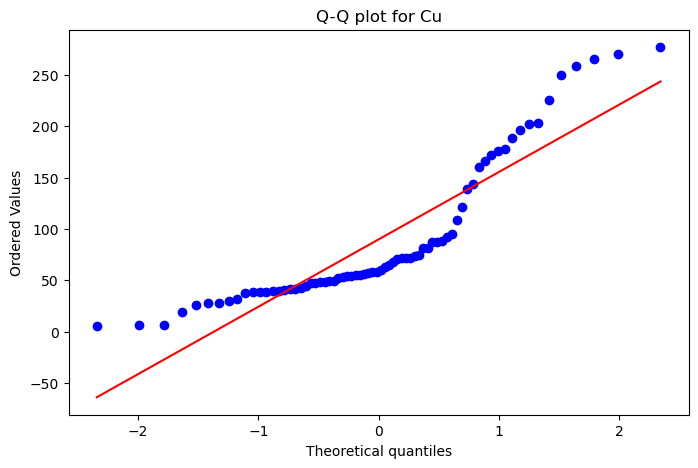

/Users/fs17974/anaconda3/envs/Shortproject/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


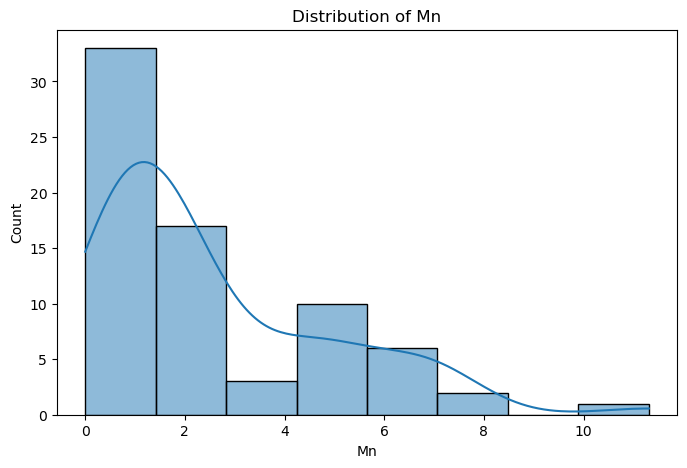

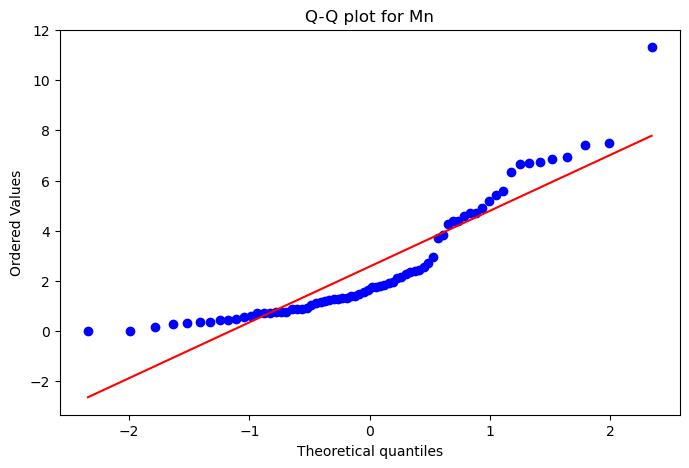

/Users/fs17974/anaconda3/envs/Shortproject/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


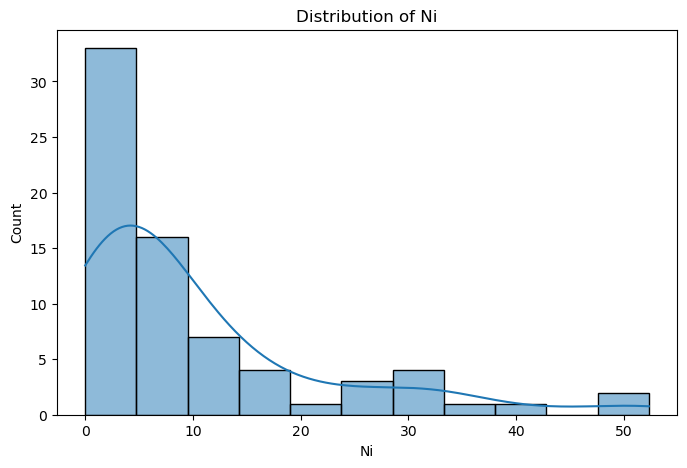

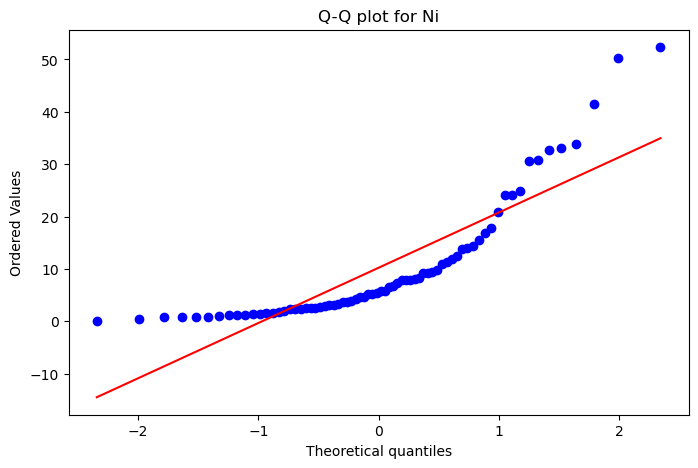

/Users/fs17974/anaconda3/envs/Shortproject/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


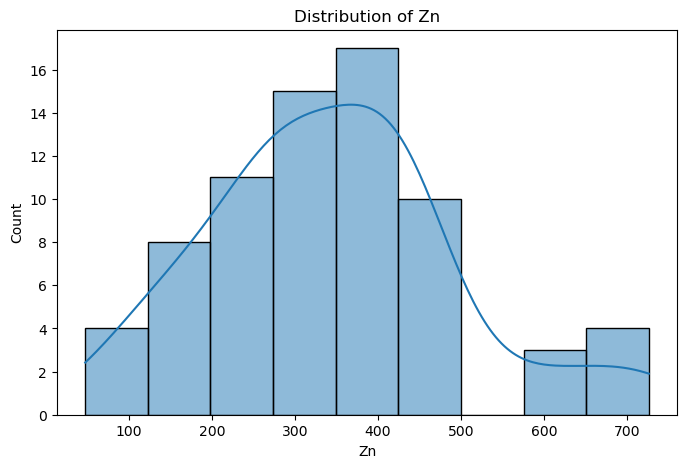

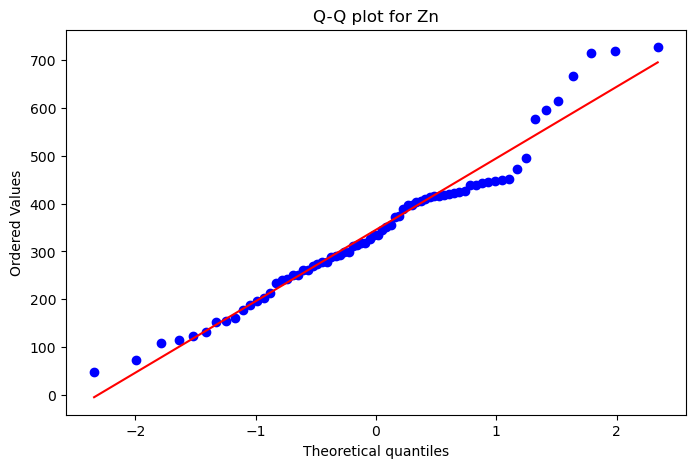

In [12]:

metals = ['Cr', 'Cu', 'Mn', 'Ni', 'Zn']

for metal in metals:
    plt.figure(figsize=(8, 5))
    sns.histplot(Nematode[metal], kde=True)
    plt.title(f'Distribution of {metal}')
    plt.show()

    plt.figure(figsize=(8, 5))
    stats.probplot(Nematode[metal], plot=plt)
    plt.title(f'Q-Q plot for {metal}')
    plt.show()


Based on the distribution and QQ plots it seems that the concentrations of the heavy metals Cr, Cu, Mn and Ni are not normally distributed. However Zn is less clear so I next perform a Shapiro-Wilk test for testing normality.

In [13]:
from scipy.stats import shapiro

for metal in metals:
    stat, p_value = shapiro(Nematode[metal])
    print(f'Shapiro-Wilk test for {metal}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}')

Shapiro-Wilk test for Cr: W-statistic = 0.6760, p-value = 0.0000
Shapiro-Wilk test for Cu: W-statistic = 0.8225, p-value = 0.0000
Shapiro-Wilk test for Mn: W-statistic = 0.8449, p-value = 0.0000
Shapiro-Wilk test for Ni: W-statistic = 0.7599, p-value = 0.0000
Shapiro-Wilk test for Zn: W-statistic = 0.9643, p-value = 0.0389


Based on the results of the Shapiro wilks test I decide that Zn is also not normally distributed. Therefore I next perform the non-parametric Kruskal-Wallis test. Where there is a significant difference between trophic groups I then perform a Tukey post-hoc tets. All significance levels are set to 0.05. 

In [14]:
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for metal in metals:
    
    kruskal_result = kruskal(*[Nematode[Nematode['Trophic_group'] == group][metal] for group in Nematode['Trophic_group'].unique()])
    print(f"\nKruskal-Wallis for {metal}: H-statistic = {kruskal_result.statistic:.4f}, p-value = {kruskal_result.pvalue:.4f}")

   
    if kruskal_result.pvalue < 0.05:
        
        data_for_posthoc = pd.DataFrame({group: Nematode[Nematode['Trophic_group'] == group][metal].values for group in Nematode['Trophic_group'].unique()})
        flat_data = data_for_posthoc.melt(var_name='Trophic_group', value_name='Metal_Concentration')
        
        tukey_results = pairwise_tukeyhsd(endog=flat_data['Metal_Concentration'], groups=flat_data['Trophic_group'], alpha=0.05)
        print(f"Pairwise Tukey's HSD test results for {metal}:\n{tukey_results}\n")




Kruskal-Wallis for Cr: H-statistic = 5.9331, p-value = 0.1149

Kruskal-Wallis for Cu: H-statistic = 45.7095, p-value = 0.0000
Pairwise Tukey's HSD test results for Cu:
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
        group1                 group2         meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------
       deposit feeders     microalgal grazers  21.0161 0.1587  -5.1553  47.1875  False
       deposit feeders predators of metazoans  -2.6583 0.9932 -28.8297  23.5131  False
       deposit feeders  predators of microbes 152.2094    0.0 126.0381 178.3808   True
    microalgal grazers predators of metazoans -23.6744 0.0902 -49.8458   2.4969  False
    microalgal grazers  predators of microbes 131.1933    0.0 105.0219 157.3647   True
predators of metazoans  predators of microbes 154.8678    0.0 128.6964 181.0392   True
------------------------------------------------

I now want to investigate whether there is a significant difference in the heavy metal concentrations between the contaminated area (Bagnoli-Coroglio Bay) and the control area (Gabicce Mare. To investigate this, I first plot some bar graphs using the seaborn barplot function which also plots bootstrapped confidence intervals on the graph.

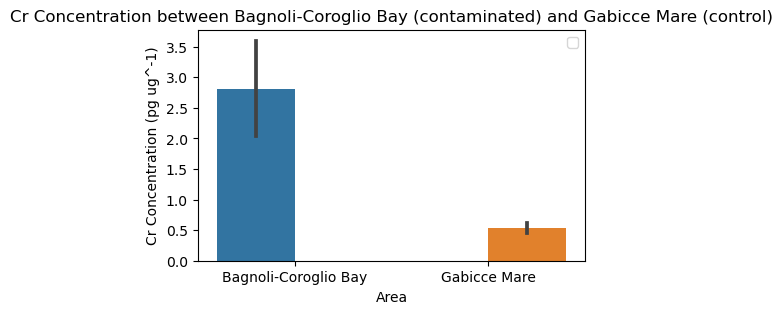

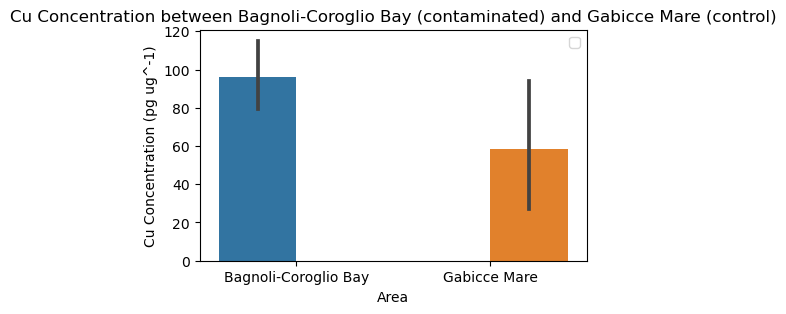

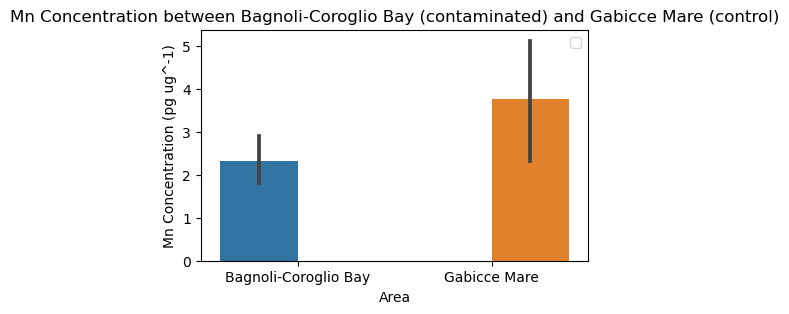

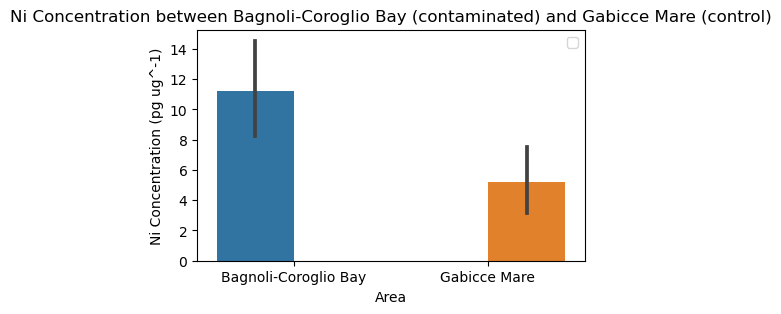

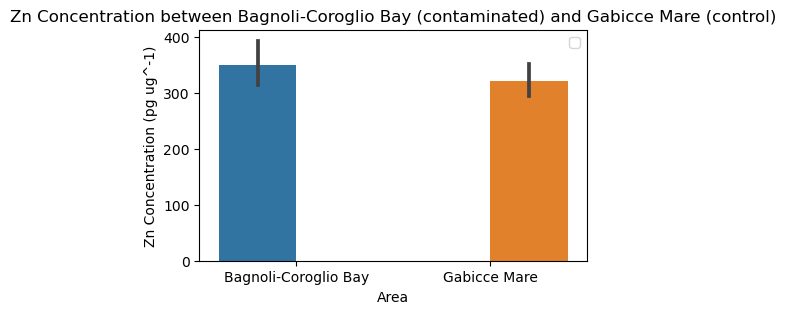

In [15]:

area1_data = Nematode[Nematode['Area'] == 'Bagnoli-Coroglio Bay']
area2_data = Nematode[Nematode['Area'] == 'Gabicce Mare']

metals = ['Cr', 'Cu', 'Mn', 'Ni', 'Zn']

for metal in metals:
    plt.figure(figsize=(5, 3))
    sns.barplot(x='Area', y=metal, data=pd.concat([area1_data, area2_data]), hue='Area')
    plt.title(f'{metal} Concentration between Bagnoli-Coroglio Bay (contaminated) and Gabicce Mare (control)')
    plt.ylabel(f'{metal} Concentration (pg ug^-1)')
    plt.legend([])
    plt.show()

I then investigate if there is a significant difference using the Kruskal-Wallis non-parametric test since the metal concentration data is not normally distributed.

In [16]:
from scipy.stats import kruskal

area1_data = Nematode[Nematode['Area'] == 'Bagnoli-Coroglio Bay']
area2_data = Nematode[Nematode['Area'] == 'Gabicce Mare']

metals = ['Cr', 'Cu', 'Mn', 'Ni', 'Zn']

for metal in metals:
    data_for_kruskal = [area1_data[metal], area2_data[metal]]
    
    kruskal_result = kruskal(*data_for_kruskal)
    
    print(f"Kruskal-Wallis for {metal}: H-statistic = {kruskal_result.statistic:.4f}, p-value = {kruskal_result.pvalue:.4f}")


Kruskal-Wallis for Cr: H-statistic = 13.8189, p-value = 0.0002
Kruskal-Wallis for Cu: H-statistic = 7.3153, p-value = 0.0068
Kruskal-Wallis for Mn: H-statistic = 2.8386, p-value = 0.0920
Kruskal-Wallis for Ni: H-statistic = 1.6691, p-value = 0.1964
Kruskal-Wallis for Zn: H-statistic = 0.5260, p-value = 0.4683


I next want to investigate whether there is a positive correlation between nematode individual biomass and heavy metal concentration. For this I use the LinearRegression function from scikitlearn. Here I've plotted the graph with the fitted line as well as printed the model gradient and intercept.

 Model gradient:  -0.12104714584859047
Model intercept: 2.5763478494774983


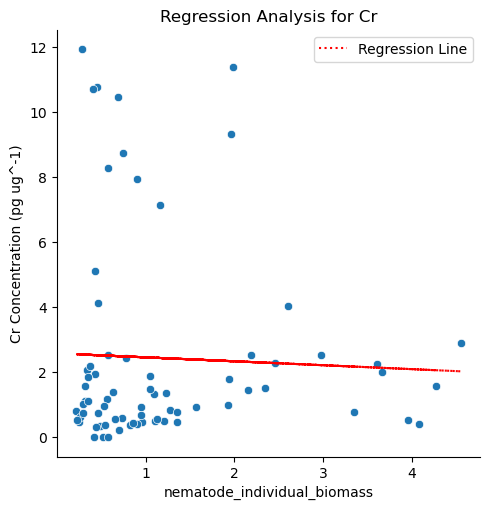

 Model gradient:  -20.596883707524068
Model intercept: 114.9472593053741


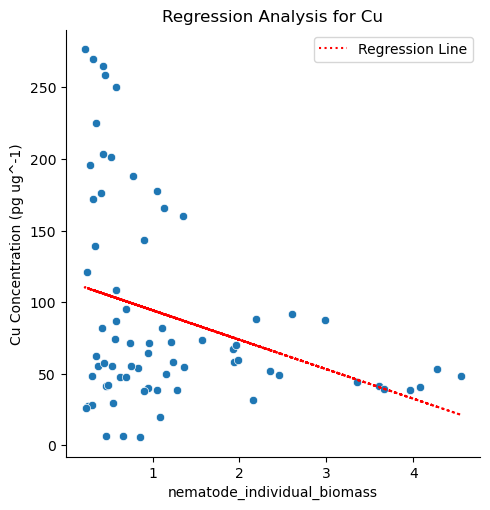

 Model gradient:  -0.15047566069021429
Model intercept: 2.757475280543593


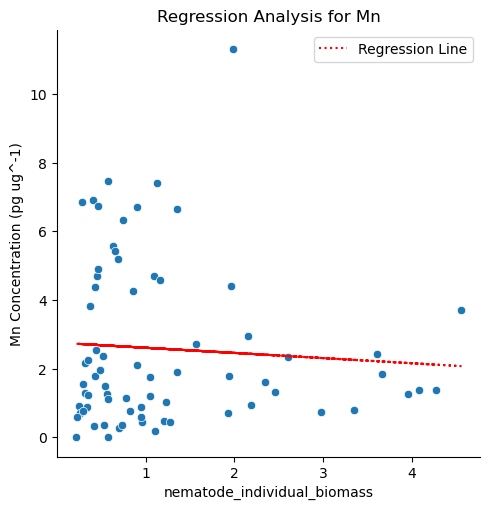

 Model gradient:  -2.1249721769933987
Model intercept: 12.829323745056818


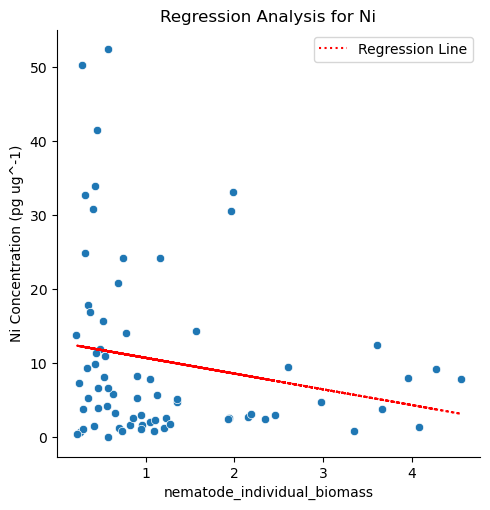

 Model gradient:  57.577142718718164
Model intercept: 274.9669279464059


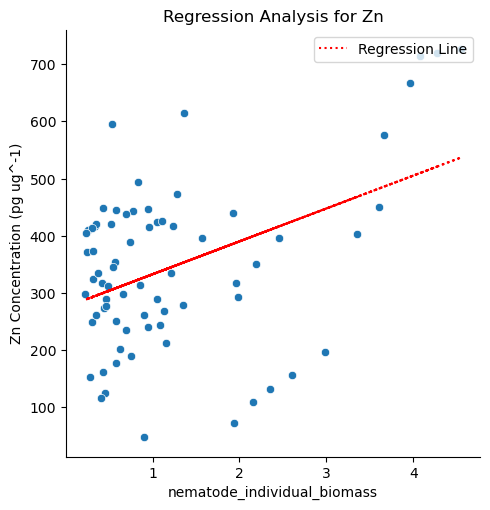

In [17]:

metals = ['Cr', 'Cu', 'Mn', 'Ni', 'Zn']

for metal in metals:
    data = Nematode[['nematode_individual_biomass', metal]]
    
    model = LinearRegression()
    model.fit(data[['nematode_individual_biomass']], data[metal])

    
    sns.relplot(x='nematode_individual_biomass', y=metal, data=data, kind='scatter')
    plt.plot(data['nematode_individual_biomass'], model.predict(data[['nematode_individual_biomass']]), color='red', linestyle=":", label='Regression Line')
    plt.title(f'Regression Analysis for {metal}')
    
    plt.ylabel(f'{metal} Concentration (pg ug^-1)')
    plt.legend(loc='upper right')

    print(" Model gradient: ", model.coef_[0])
    print("Model intercept:", model.intercept_)
    
    plt.show()


Above I fitted and plotted the linear regression for each heavy metal compared to nematode individual biomass. The only metal with a posisitve correlation to the nematode biomass appears to be Zn. However, it would be good to test how good these model fits are. To do this we can use the train-test split function in scikitlearn. I have looped it so that it does this for each metal and then prints the model score (R^2 value) to 4 decimal places for each model. 

R^2 score for Cr:-0.0874
R^2 score for Cu:0.1107
R^2 score for Mn:-0.0223
R^2 score for Ni:-0.0257
R^2 score for Zn:0.3080


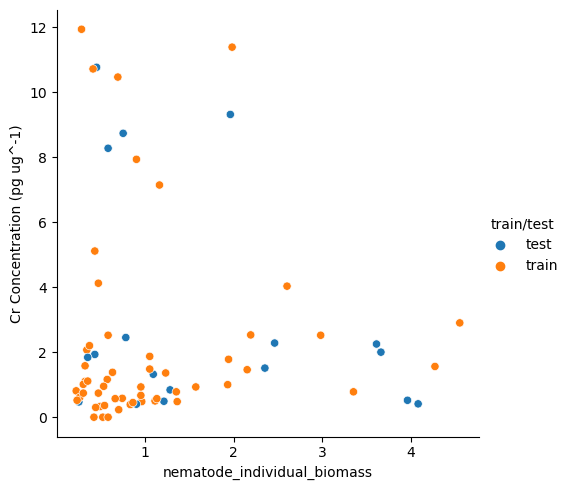

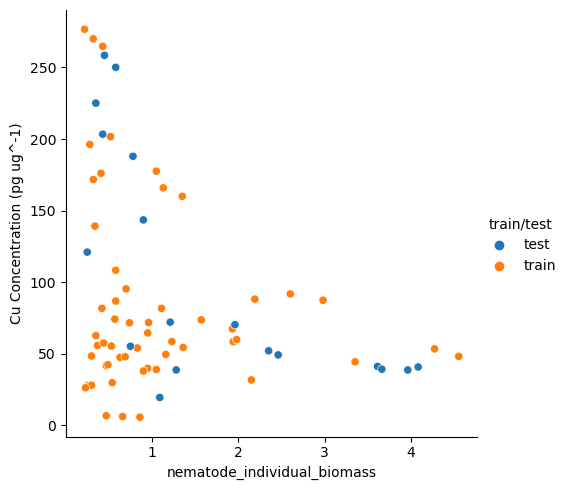

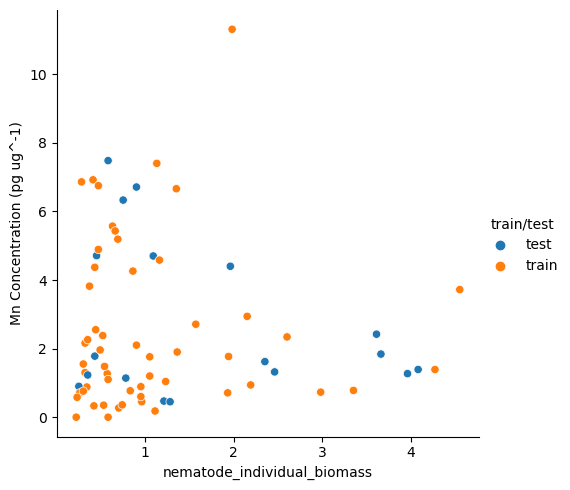

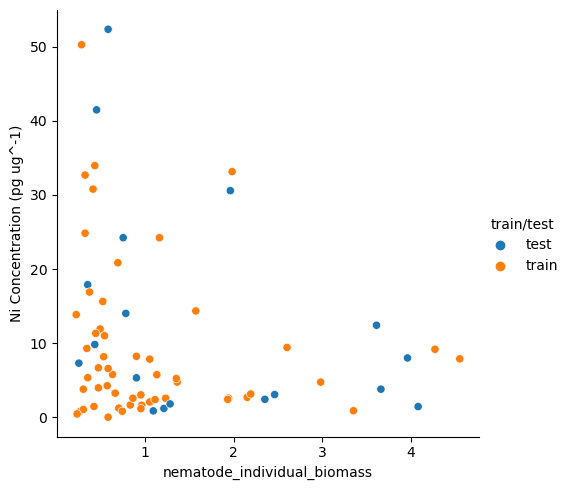

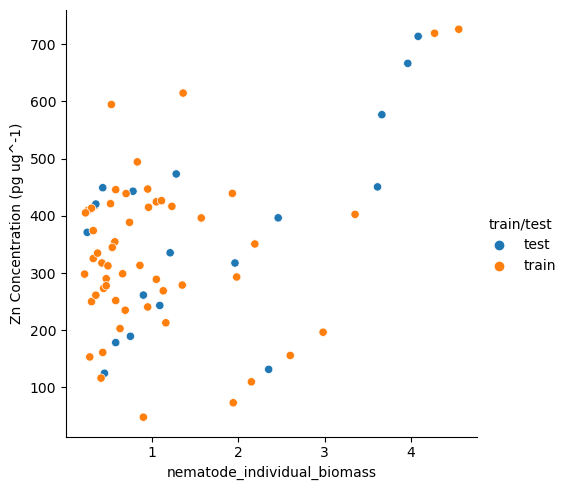

In [18]:
from sklearn.model_selection import train_test_split

metals = ['Cr', 'Cu', 'Mn', 'Ni', 'Zn']

for metal in metals:
    
    X = Nematode[["nematode_individual_biomass"]]
    y = Nematode[metal]
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
    
    Nematode.loc[train_X.index, "train/test"] = "train"
    Nematode.loc[test_X.index, "train/test"] = "test"

    sns.relplot(data=Nematode, x="nematode_individual_biomass", y=metal, hue="train/test", kind="scatter")

    model = LinearRegression(fit_intercept=True)
    model.fit(train_X, train_y)

    plt.ylabel(f'{metal} Concentration (pg ug^-1)')
    
    score = model.score(test_X, test_y)
    print(f'R^2 score for {metal}:{score:.4f}')

plt.show()


Of the model scores, CU and Zn are the only metals that have a positive R squared value. Of these, Zn is the best but  even this is very low and this model only explains 30% of the variability in the data. Therefore it  might be better to take into account the different trophic levels when exploring the relationship between nematode biomass and heavy metal concentration. Here I investigate the correlation of nematode individual biomass and Zn concentration within the individual trophic groups through looping through them. I train and test the model to get a model score (R^2 value) for each linear regression model. The model scores indicate that the trophic level: predators of metezoans explains the most variability in the data (81.63%).  

R^2 score for Zn in Trophic group predators of microbes: -3.6761


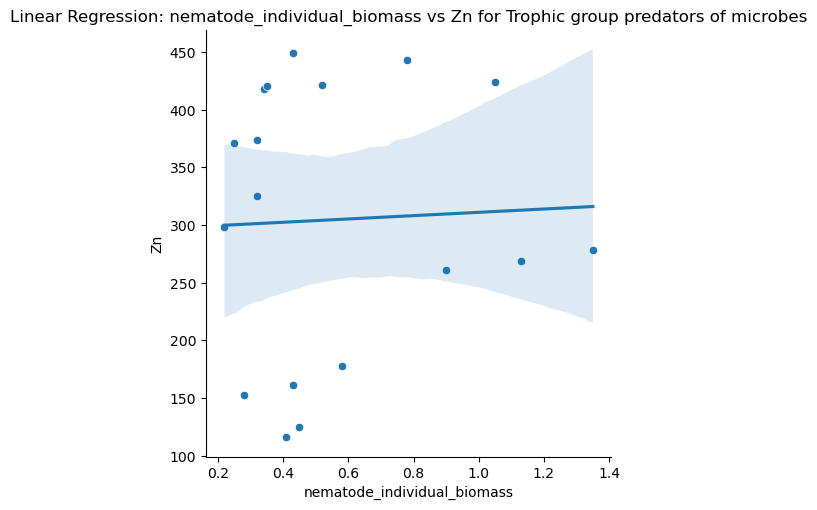

R^2 score for Zn in Trophic group deposit feeders: 0.2710


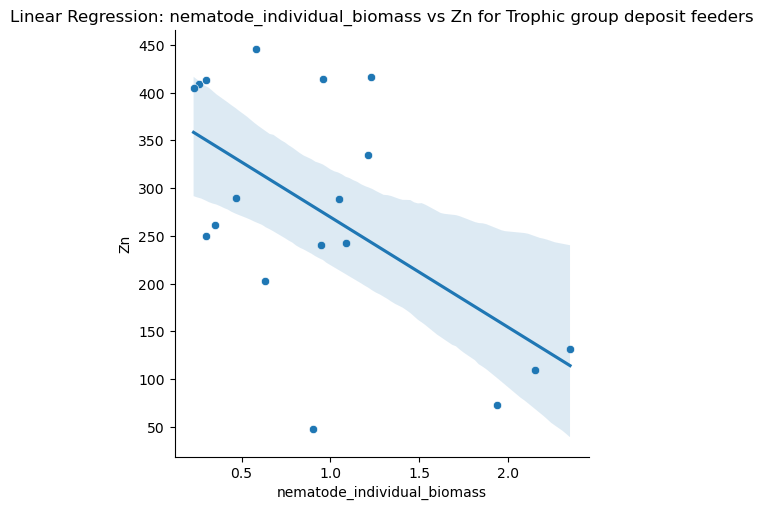

R^2 score for Zn in Trophic group microalgal grazers: -1.2502


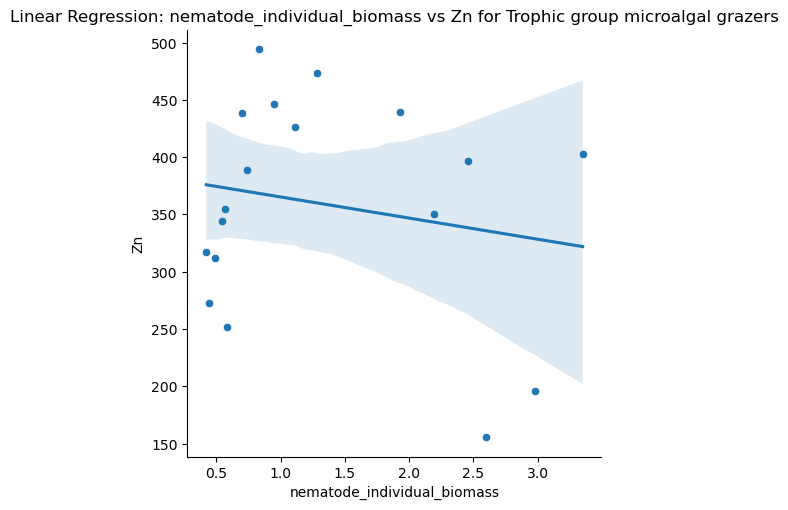

R^2 score for Zn in Trophic group predators of metazoans: 0.8163


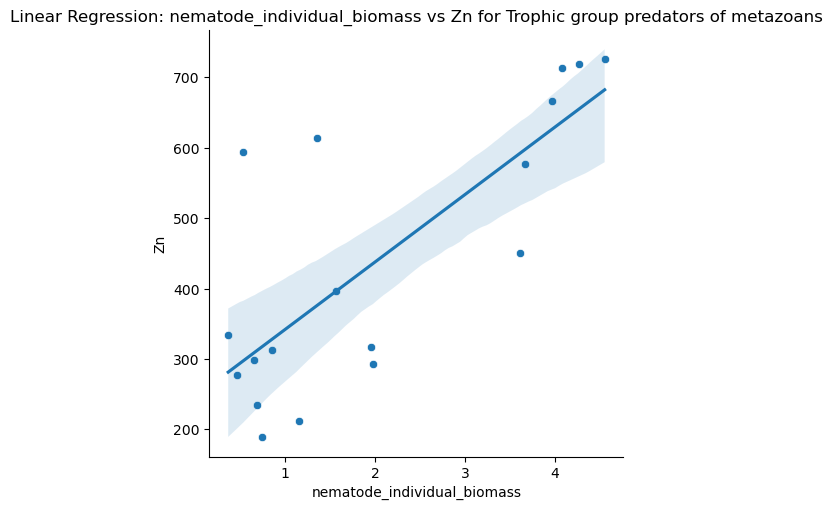

In [19]:


trophic_levels = Nematode['Trophic_group'].unique()

x_column = 'nematode_individual_biomass'
y_column = 'Zn'


for trophic_level in trophic_levels:
    trophic_data = Nematode[Nematode['Trophic_group'] == trophic_level]

    X = trophic_data[[x_column]]
    y = trophic_data[y_column]
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(train_X, train_y)

    predictions = model.predict(test_X)

    score = model.score(test_X, test_y)
    print(f'R^2 score for {y_column} in Trophic group {trophic_level}: {score:.4f}')

    scatter_plot = sns.relplot(x=x_column, y=y_column, data=trophic_data, kind="scatter")
    scatter_plot.set(title=f"Linear Regression: {x_column} vs {y_column} for Trophic group {trophic_level}")

    sns.regplot(x=x_column, y=y_column, data=trophic_data, scatter=False, ax=scatter_plot.ax)

    plt.show()
